In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
sys.path.append("/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/Sample code")

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 14.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=cc91e7f87b5fbad6a484fa3df27f387de05cc988434353bb55c1859120b876a9
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=82a151cf6022c42c5cab3e86a74915b57832b1e0e88d2acb977aeffa8470fee0
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311933 sha256=db3eaea8346468312ed12f32bc3d5b2c824335689d7ae5f3483d5aa64a305330
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.8 MB/s 
     |████████████████████████████████| 2.9 MB 48.9 MB/s 
     |████████████████████████████████| 3.3 MB 30.8 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 71.6 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=2b0d179d18165fd32b6acbaf4235ff9fb0e70e7ef6feb0d38612e8a0479eb861
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import embed_cluster as ec

sklearn modules imported


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


transformer module imported


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:664: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import umap
#import umap.plot
import hdbscan
import spacy
from spacy.lang.en import English

from sklearn.manifold import MDS, TSNE


import pickle


In [ ]:
data_dir = "/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/data"
os.chdir(data_dir)
os.listdir()

['since_2016_ehr_no_dupes.csv',
 'scopus_ijee_filtered_mod_20201029.csv',
 'jee_article_df_cleaned_20210608.csv',
 'jee_article_df_cleaned_20210608.zip',
 'scopus_ijee_filtered_mod_20201029.zip',
 '.Rhistory',
 '.RData',
 'jee-article-df-cleaned-20210608.db',
 'english-ewt-ud-2.5-191206.udpipe',
 'sample docs',
 'Sample Interviews']

In [ ]:
jee_df = pd.read_csv("jee_article_df_cleaned_20210608.csv")

In [ ]:
jee_df.columns

Index(['title', 'year', 'first_pg', 'last_pg', 'authors', 'schools',
       'article_type', 'volume', 'issue', 'abstract', 'keywords', 'url',
       'article_url_list_index'],
      dtype='object')

In [ ]:

# =============================================================================
# Utility functions
# =============================================================================



def select_and_filter(original_df, text_column):
    """
    Parameters
    ----------
    item : str
        Name of the column to filter based on.
    original_df : dataframe
        Original input dataframe with text columns.

    Returns
    -------
    filtered_df : dataframe
        Dataframe that has removed the NAs in the {item} column.
    item_list : list
        List of the text in the {item} column. This list is passed to the transformer model.
    """
    original_df['added_id'] = original_df.index + 1
    filtered_df = original_df.loc[pd.notnull(original_df[text_column])]
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {filtered_df.shape}.")
    
    item_list = filtered_df[text_column].to_list()
    print(f"The list has length {len(item_list)}.")
        
    return filtered_df, item_list

jee_df.columns

jee_filtered_df, jee_filtered_list = select_and_filter(jee_df, 'abstract')
# 1089 x 14





Filtered dataframe for abstract.
Dataframe has size (1426, 14).
The list has length 1426.


In [ ]:

def sentence_segmenter(data_frame, text_column):
    # first, create list from series of text
    
    entry_list = data_frame[text_column].to_list()
    
    # try using dictionary of lists
    
    new_df_dict = {'text_column': [],
                   'original_id': [],
                   'original_entry': [],
                   'split_sent': [],
                   'sent_num': []}
    
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    
    ## using the process of converting series to list and then iterating over list
    for i, entry in enumerate(entry_list):
        doc = nlp(entry)
        sentences = [sent.string.strip() for sent in doc.sents]
        for j, sent in enumerate(sentences):
            new_df_dict['text_column'].append(text_column)
            new_df_dict['original_id'].append(i)
            new_df_dict['original_entry'].append(entry)
            new_df_dict['split_sent'].append(sent)
            new_df_dict['sent_num'].append(j)
            
    sentence_df = pd.DataFrame(new_df_dict)
    
    item_list = sentence_df['split_sent'].to_list()
    
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {sentence_df.shape}.")
    print(f"The list has length {len(item_list)}.")

    
    return sentence_df, item_list
    

In [ ]:
jee_sentence_df, jee_sent_list = sentence_segmenter(jee_filtered_df, 'title')


Filtered dataframe for title.
Dataframe has size (1459, 5).
The list has length 1459.


In [ ]:
# Next, use the sentence list for embedding

sent_embedding = ec.embed_raw_text(jee_sent_list, 'mpnet', max_seq_length=200)
    

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original model max_seq_length: 512.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 1459.
The dimension of the embedding is (1459, 768).


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP projection completed. Started with (1459, 85). Returning (1459, 5).
Dimension of umap projection: (1459, 5).


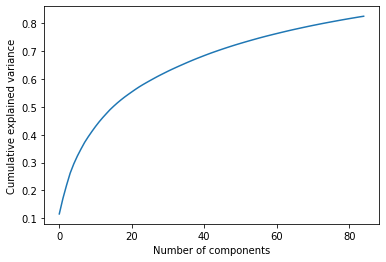

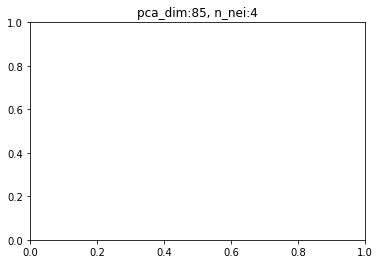

In [ ]:

embed_param_dict = embed_param_dict= {'pca_dim': 85,
                   'n_neighbors': 4,
                   'min_dist': 0.0,
                   'n_components': 5,
                   'metric': 'cosine',
                   'random_state': 123}

embed_param_title = "pca_dim:" + str(embed_param_dict['pca_dim']) + ', n_nei:' + str(embed_param_dict['n_neighbors'])

lower_embed = ec.project_original_embedding(sent_embedding, 
                                            embed_param_dict, 
                                            to_low = False, 
                                            mid_to_low_method='umap',
                                            title=embed_param_title)
   

You have selected agglomerative for clustering.
Clustering completed.


<Figure size 432x288 with 0 Axes>

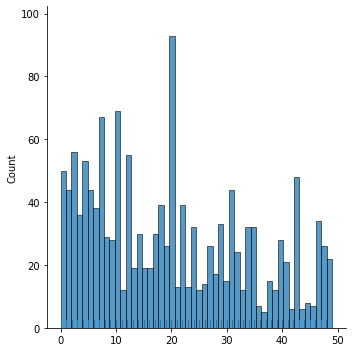

[43 10 10 ... 29 27  9]
The minimum cluster number is: 0.
The length of cluster_model.labels_ is 1459.
The length of the original corpus list is 1459.
Cluster  0
Cluster size: 50
['Effectiveness of a Multimedia Televised Distance Education Program for Engineering Majors', 'Effective Transfer of Computer Graphics to Video Format', "Why Isn't My Professor Using Graphics in the Freshman Programming Course?", 'A Model for On-Line Learning Networks in Engineering Education', 'Interactive Multimedia Courseware and the Hands-on Learning Experience: An Assessment Study', 'Computer-Assisted Distance Learning, Part II: Examination Performance of Students On and Off Campus', 'A Comparative Evaluation of World Wide Web-Based and Classroom Teaching', 'Perspectives on the Role of Educational Technologies', 'The Multimedia Finite Element Modeling and Analysis Tutor', 'Development of a CD-ROM in Thin Film Technologies: Design, Usability Assessment, and Challenges', 'Innovations in Large-Scale Supporte

In [ ]:
cluster_param_dict = {'min_cluster_size': 5, # hdbscan options
                      'min_samples': 1,
                      'cluster_selection_epsilon': 0.1,
                      'alpha': 1.0,
                      'metric': 'euclidean',
                      'agg_type': "n_cluster", # agglomerative options - can be threshold or n_cluster
                      'n_clusters': 50,
                      'threshold_val': 1.5,
                      'affinity': 'euclidean',
                      'linkage': 'ward',
                      'num_clusters': 30}

# version to use the lower-dimensional embedding for the clustering     
cluster_res = ec.cluster_embedding(data=lower_embed, original_corpus_list=jee_sent_list, 
                  model='agglomerative', param_dict=cluster_param_dict, plot_option=True)



In [ ]:

all_cluster_labels = cluster_res.labels_

jee_sentence_df['cluster_label'] = all_cluster_labels
